# Machine Learning Nanodegree

Hello Kagglers this notebook is part of my Capstone Project for Udacity ML Engineer Nanodegree Program. You can check my [repository](https://github.com/sid321axn/Udacity-MLND-Capstone-Gold-Price-Prediction) for full documentation about the project.

## Gold Rates Prediction using Machine Learning Approach

Historically, gold had been used as a form of currency in various parts of the world including USA. In present times, precious metals like gold are held with central banks of all countries to guarantee re-payment of foreign debts, and also to control inflation which results in reflecting the financial strength of the country. 

Forecasting rise and fall in the daily gold rates, can help investors to decide when to buy (or sell) the commodity. 

We in this project would forecast gold rates using the most comprehensive set of features and would apply various machine learning algorithms for forecasting and compare their results. We also identify the attributes that highly influence the gold rates.

![Gold ETF](https://i.ibb.co/S07Np5F/Gold.png)


![Gold ETF](https://i.ibb.co/S07Np5F/Gold.png)


## Project Work Flow

I would proceed the project as shown in the below mentioned steps.


![Project Work Flow](https://i.ibb.co/bbcVFwS/pd.png)

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model
from sklearn.model_selection import TimeSeriesSplit
from sklearn.svm import SVR
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/gold-price-prediction-dataset/FINAL_USO.csv


## About Data

Data for this study is collected from **November 18th 2011** to **January 1st 2019** from various sources. The data has **1718** rows in total and **80** columns in total. Data for attributes, such as Oil Price, Standard and Poor’s (S&P) 500 index, Dow Jones Index US Bond rates (10 years), Euro USD exchange rates, prices of precious metals Silver and Platinum and other metals such as Palladium and Rhodium, prices of  US Dollar Index, Eldorado Gold Corporation and Gold Miners ETF were gathered. 

**Attributes:**

**Features**

- Gold ETF :- Date, Open, High, Low, Close and Volume.
- S&P 500 Index :- 'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume' 
- Dow Jones Index :- 'DJ_open','DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume' 
- Eldorado Gold Corporation (EGO) :- 'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume'
- EURO - USD Exchange Rate :- 'EU_Price','EU_open', 'EU_high', 'EU_low', 'EU_Trend' 
- Brent Crude Oil Futures :- 'OF_Price', 'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend'
- Crude Oil WTI USD :- 'OS_Price', 'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend'
- Silver Futures :- 'SF_Price', 'SF_Open', 'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend'
- US Bond Rate (10 years) :- 'USB_Price', 'USB_Open', 'USB_High','USB_Low', 'USB_Trend' 
- Platinum Price :- 'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low','PLT_Trend'
- Palladium Price :- 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low','PLD_Trend' 
- Rhodium Prices :- 'RHO_PRICE' 
- US Dollar Index : 'USDI_Price', 'USDI_Open', 'USDI_High','USDI_Low', 'USDI_Volume', 'USDI_Trend' 
- Gold Miners ETF :- 'GDX_Open', 'GDX_High', 'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume' 
- Oil ETF USO :- 'USO_Open','USO_High', 'USO_Low', 'USO_Close', 'USO_Adj Close', 'USO_Volume'

**Target Variable**
- Gold ETF :- Adjusted Close

In [3]:
df_final = pd.read_csv("/kaggle/input/gold-price-prediction-dataset/FINAL_USO.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)

In [4]:
df_final.head()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,124.169998,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [5]:
df_final.shape

(1718, 80)

So, we have 1718 records in the dataset and 80 columns including Adjusted Close which is our target variable.

In [6]:
df_final.describe()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,...,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,...,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,...,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,...,12.400000,12.470000,12.269618,4.729000e+06,7.820000,8.030000,7.670000,7.960000,7.960000,1.035100e+06
25%,116.220001,116.540001,115.739998,116.052502,116.052502,5.412925e+06,170.392498,170.962506,169.577499,170.397500,...,20.355000,20.585000,20.180950,2.259968e+07,11.420000,11.500000,11.300000,11.392500,11.392500,6.229500e+06
50%,121.915001,122.325001,121.369999,121.795002,121.795002,7.483900e+06,205.464996,206.459999,204.430000,205.529999,...,22.870001,23.054999,22.677604,3.730465e+07,16.450000,16.635001,16.040000,16.345000,16.345000,1.613015e+07
75%,128.427494,129.087498,127.840001,128.470001,128.470001,1.020795e+07,237.292500,237.722500,236.147502,236.889996,...,26.797500,27.317500,26.478154,5.697055e+07,34.419998,34.667499,34.110000,34.417499,34.417499,2.672375e+07
max,173.199997,174.070007,172.919998,173.610001,173.610001,9.380420e+07,293.089996,293.940002,291.809998,293.579987,...,56.770000,57.470001,54.617039,2.321536e+08,41.599998,42.299999,41.299999,42.009998,42.009998,1.102657e+08


# Checking Missing Values

In [7]:
df_final.isnull().values.any()

False

That's great ! we dont have any missing values in our dataset

## Effect of Index prices on gold rates

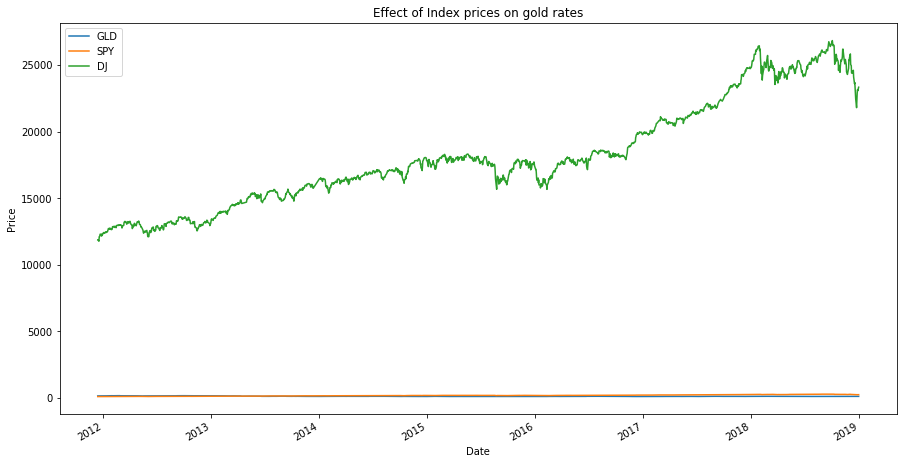

In [8]:
GLD_adj_close = df_final['Adj Close']
SPY_adj_close = df_final['SP_Ajclose']
DJ_adj_close  = df_final['DJ_Ajclose']

df_p = pd.DataFrame({'GLD':GLD_adj_close, 'SPY':SPY_adj_close, 'DJ':DJ_adj_close})

df_ax = df_p.plot(title='Effect of Index prices on gold rates',figsize=(15,8))

df_ax.set_ylabel('Price')
df_ax.legend(loc='upper left')
plt.show()

## Computing Daily Returns of all Features

In [9]:
def compute_daily_returns(df):
    """Compute and return the daily return values."""
    # TODO: Your code here
    # Note: Returned DataFrame must have the same number of rows
    daily_return = (df / df.shift(1)) - 1
    daily_return[0] = 0
    return daily_return


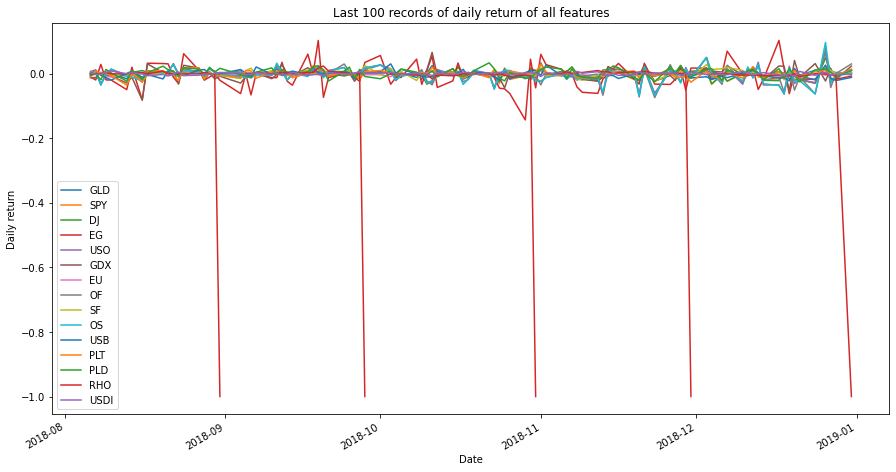

In [10]:
GLD_adj_close = df_final['Adj Close']
SPY_adj_close = df_final['SP_Ajclose']
DJ_adj_close  = df_final['DJ_Ajclose']
EG_adj_close =  df_final['EG_Ajclose']
USO_Adj_close = df_final['USO_Adj Close']
GDX_Adj_close = df_final['GDX_Adj Close']
EU_price      = df_final['EU_Price']
OF_price      = df_final['OF_Price']
OS_price      = df_final['OS_Price']
SF_price      = df_final['SF_Price']
USB_price      = df_final['USB_Price']
PLT_price      = df_final['PLT_Price']
PLD_price      = df_final['PLD_Price']
rho_price      = df_final['RHO_PRICE']
usdi_price      = df_final['USDI_Price']



GLD_daily_return = compute_daily_returns(GLD_adj_close)
SPY_daily_return = compute_daily_returns(SPY_adj_close)
DJ_adj_return    = compute_daily_returns(DJ_adj_close)
EG_adj_return     = compute_daily_returns(EG_adj_close)
USO_Adj_return    = compute_daily_returns(USO_Adj_close)
GDX_Adj_return   =compute_daily_returns(GDX_Adj_close)
EU_return        = compute_daily_returns(EU_price)
OF_price         =compute_daily_returns(OF_price)
OS_price         =compute_daily_returns(OS_price)
SF_price         =compute_daily_returns(SF_price)
USB_price         =compute_daily_returns(USB_price)
PLT_price         =compute_daily_returns(PLT_price)
PLD_price         =compute_daily_returns(PLD_price)
rho_price         =compute_daily_returns(rho_price)
USDI_price         =compute_daily_returns(usdi_price)

df_d = pd.DataFrame({'GLD':GLD_daily_return, 'SPY':SPY_daily_return, 'DJ':DJ_adj_return, 'EG':EG_adj_return, 'USO':USO_Adj_return,
                  'GDX':GDX_Adj_return,'EU':EU_return, 'OF':OF_price,'SF':SF_price,'OS':OS_price, 'USB':USB_price, 'PLT':PLT_price, 'PLD':PLD_price,
                  'RHO':rho_price,'USDI':USDI_price})

daily_ax = df_d[-100:].plot(title='Last 100 records of daily return of all features',figsize=(15,8))

daily_ax.set_ylabel('Daily return')
daily_ax.legend(loc='lower left')
plt.show()

## Computing daily returns of stock indexes

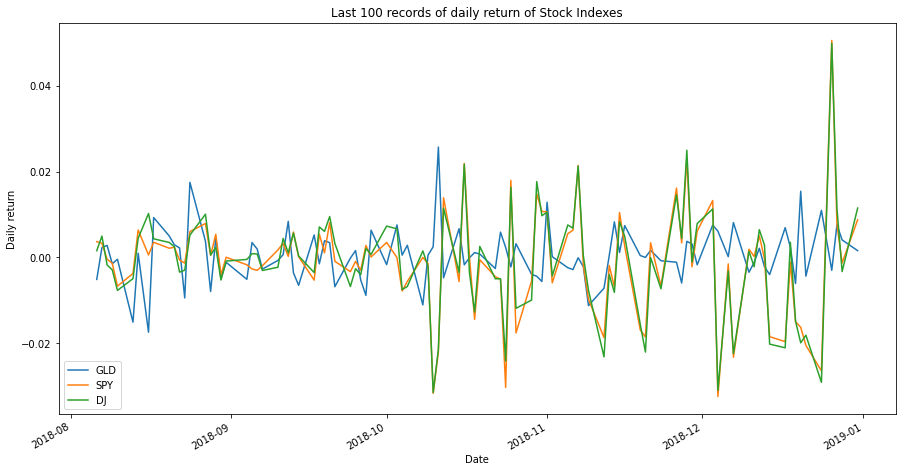

In [11]:
df_s = pd.DataFrame({'GLD':GLD_daily_return, 'SPY':SPY_daily_return, 'DJ':DJ_adj_return})

daily_ax = df_s[-100:].plot(title='Last 100 records of daily return of Stock Indexes',figsize=(15,8))

daily_ax.set_ylabel('Daily return')
daily_ax.legend(loc='lower left')
plt.show()

## Scatterplot

<AxesSubplot:xlabel='SPY', ylabel='GLD'>

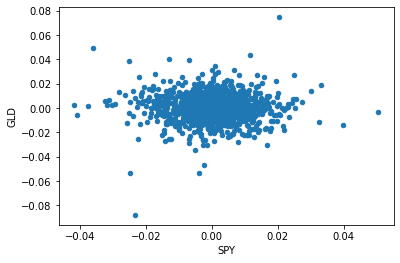

In [12]:
df_d.plot(kind='scatter', x='SPY', y='GLD')

<AxesSubplot:xlabel='DJ', ylabel='GLD'>

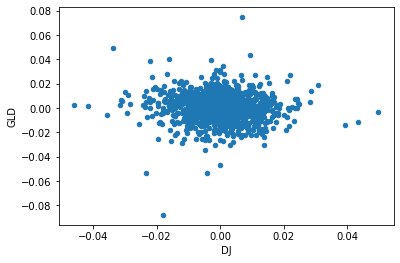

In [13]:
df_d.plot(kind='scatter', x='DJ', y='GLD')

<AxesSubplot:xlabel='EG', ylabel='GLD'>

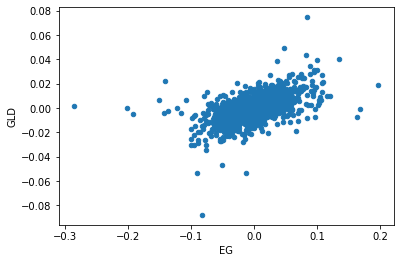

In [14]:
df_d.plot(kind='scatter', x='EG', y='GLD')

<AxesSubplot:xlabel='USO', ylabel='GLD'>

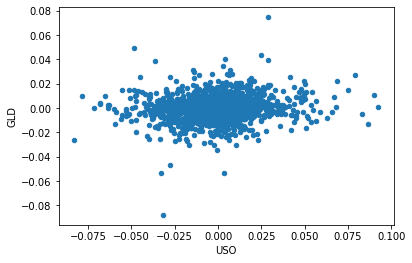

In [15]:
df_d.plot(kind='scatter', x='USO', y='GLD')

<AxesSubplot:xlabel='USB', ylabel='GLD'>

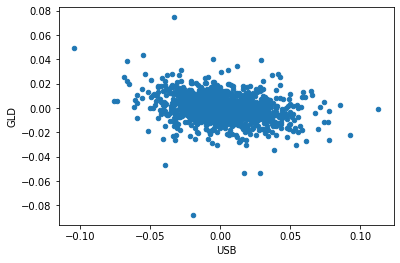

In [16]:
df_d.plot(kind='scatter', x='USB', y='GLD')

<AxesSubplot:xlabel='EU', ylabel='GLD'>

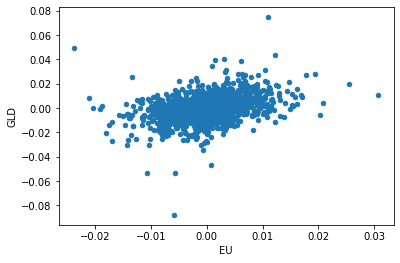

In [17]:
df_d.plot(kind='scatter', x='EU', y='GLD')

<AxesSubplot:xlabel='PLT', ylabel='GLD'>

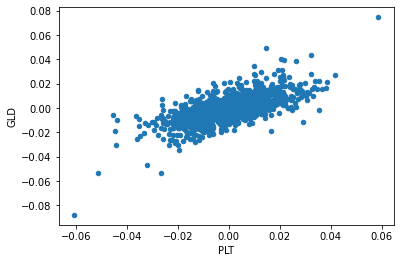

In [18]:
df_d.plot(kind='scatter', x='PLT', y='GLD')

<AxesSubplot:xlabel='PLD', ylabel='GLD'>

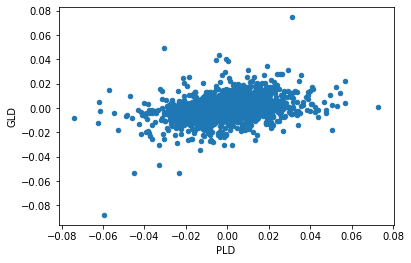

In [19]:
df_d.plot(kind='scatter', x='PLD', y='GLD')

## Statistical Measures (Mean, Standard deviation, Kurtosis)

**Kurtosis** is a statistical measure that is used to describe the distribution. Whereas skewness differentiates extreme values in one versus the other tail, kurtosis measures extreme values in either tail. Distributions with large kurtosis exhibit tail data exceeding the tails of the normal distribution (e.g., five or more standard deviations from the mean). Distributions with low kurtosis exhibit tail data that is generally less extreme than the tails of the normal distribution.


For investors, high kurtosis of the return distribution implies that the investor will experience occasional extreme returns (either positive or negative), more extreme than the usual + or - three standard deviations from the mean that is predicted by the normal distribution of returns. This phenomenon is known as **kurtosis risk**.

**Positive Kurtosis**
More weights in the tail

![Positive](pos.png)

**Negative Kurtosis**
It has as much data in each tail as it does in the peak.

![Negative](neg.png)

Mean= -8.65698612128203e-05
Standard Deviation= 0.00961153616700639
Kurtosis= 8.606584924918355


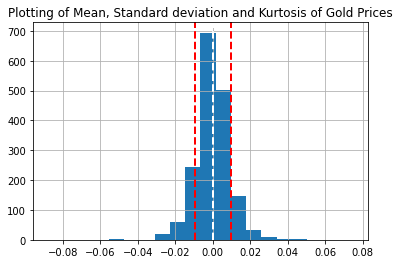

In [20]:
# computing mean,standard deviation and kurtosis of Gold ETF daily return

mean=df_d['GLD'].mean()
# computing standard deviation of Gold stock
std=df_d['GLD'].std()
kurt=df_d['GLD'].kurtosis()
print('Mean=',mean)
print('Standard Deviation=',std)
print('Kurtosis=',kurt)
#Plotting Histogram
df_d['GLD'].hist(bins=20)

plt.axvline(mean, color='w',linestyle='dashed',linewidth=2)
plt.axvline(std, color='r',linestyle='dashed',linewidth=2)
plt.axvline(-std, color='r',linestyle='dashed',linewidth=2)
plt.title("Plotting of Mean, Standard deviation and Kurtosis of Gold Prices")
plt.show()

Mean= 0.0005366024364688838
Standard Deviation= 0.008262309911393526
Kurtosis= 3.4557859039745233


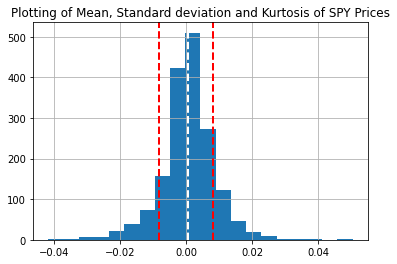

In [21]:
# computing mean,standard deviation and kurtosis of S&P 500 Index daily return

mean=df_d['SPY'].mean()
# computing standard deviation of Gold stock
std=df_d['SPY'].std()
kurt=df_d['SPY'].kurtosis()
print('Mean=',mean)
print('Standard Deviation=',std)
print('Kurtosis=',kurt)
#Plotting Histogram
df_d['SPY'].hist(bins=20)

plt.axvline(mean, color='w',linestyle='dashed',linewidth=2)
plt.axvline(std, color='r',linestyle='dashed',linewidth=2)
plt.axvline(-std, color='r',linestyle='dashed',linewidth=2)
plt.title("Plotting of Mean, Standard deviation and Kurtosis of SPY Prices")
plt.show()

Mean= 0.0004266395218751805
Standard Deviation= 0.00815178011451231
Kurtosis= 3.832719336260695


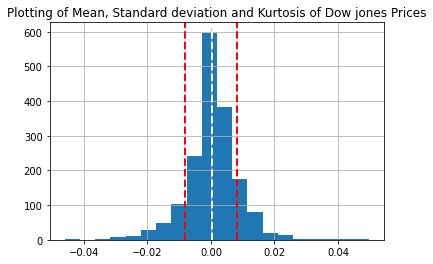

In [22]:
# computing mean,standard deviation and kurtosis of Dow Jones Index daily return
mean=df_d['DJ'].mean()
# computing standard deviation of Gold stock
std=df_d['DJ'].std()
kurt=df_d['DJ'].kurtosis()
print('Mean=',mean)
print('Standard Deviation=',std)
print('Kurtosis=',kurt)
#Plotting Histogram
df_d['DJ'].hist(bins=20)

plt.axvline(mean, color='w',linestyle='dashed',linewidth=2)
plt.axvline(std, color='r',linestyle='dashed',linewidth=2)
plt.axvline(-std, color='r',linestyle='dashed',linewidth=2)
plt.title("Plotting of Mean, Standard deviation and Kurtosis of Dow jones Prices")
plt.show()

## Correlation Analysis

### Plotting Correlation Matrix

<AxesSubplot:>

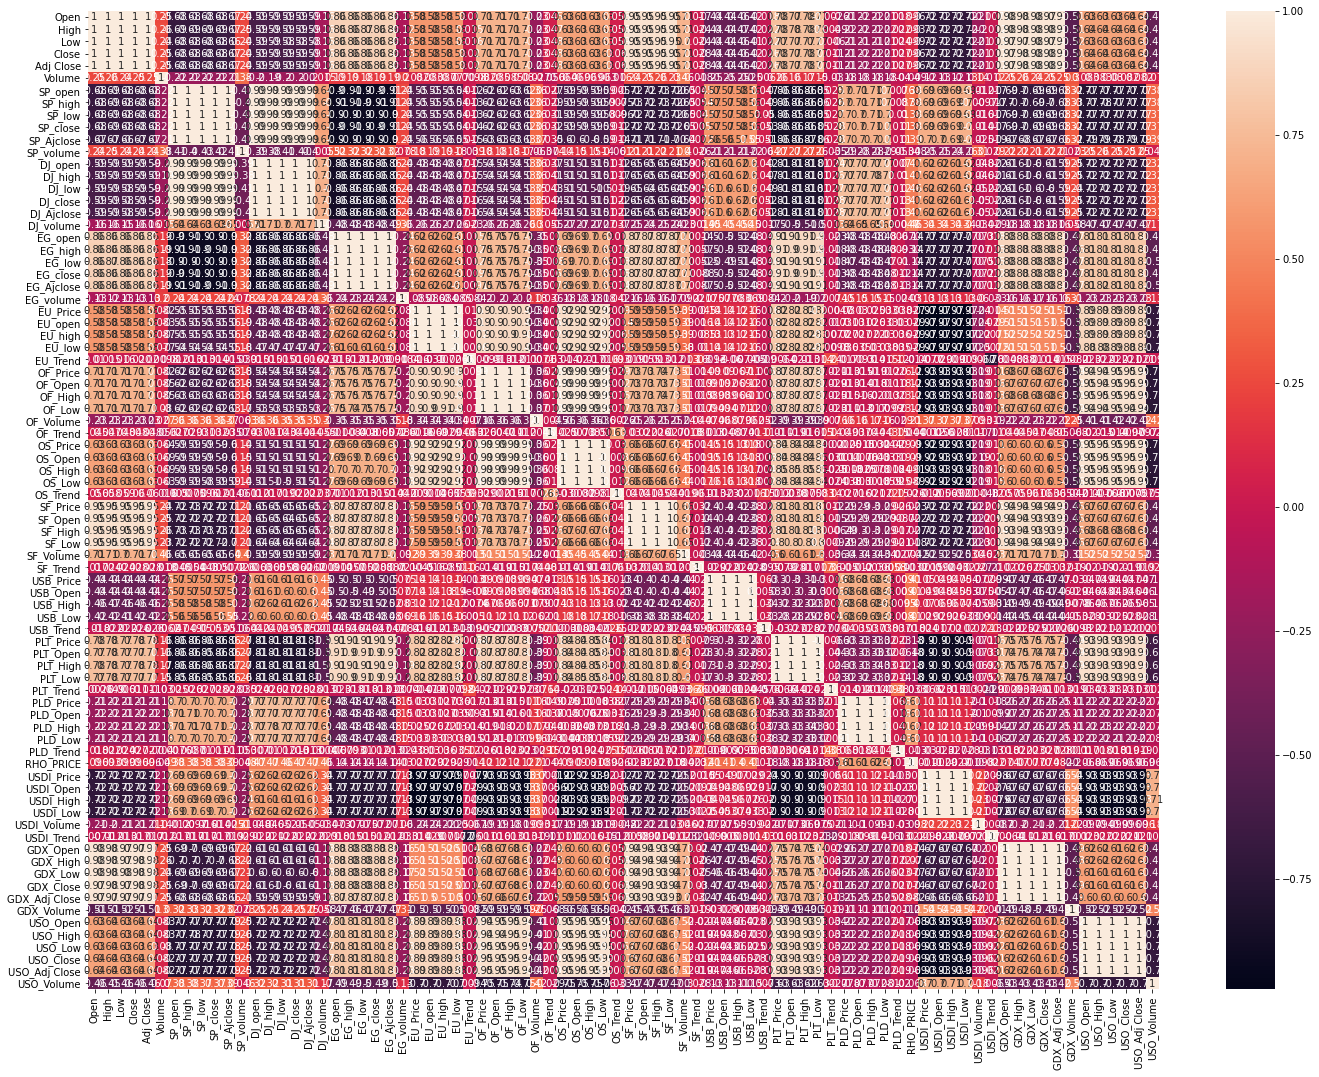

In [23]:
plt.figure(figsize=(24,18)) 
sns.heatmap(df_final.corr(), annot=True) 

In [24]:
X=df_final.drop(['Adj Close'],axis=1)
X=X.drop(['Close'],axis=1)

<AxesSubplot:title={'center':'Correlation with Adj Close'}>

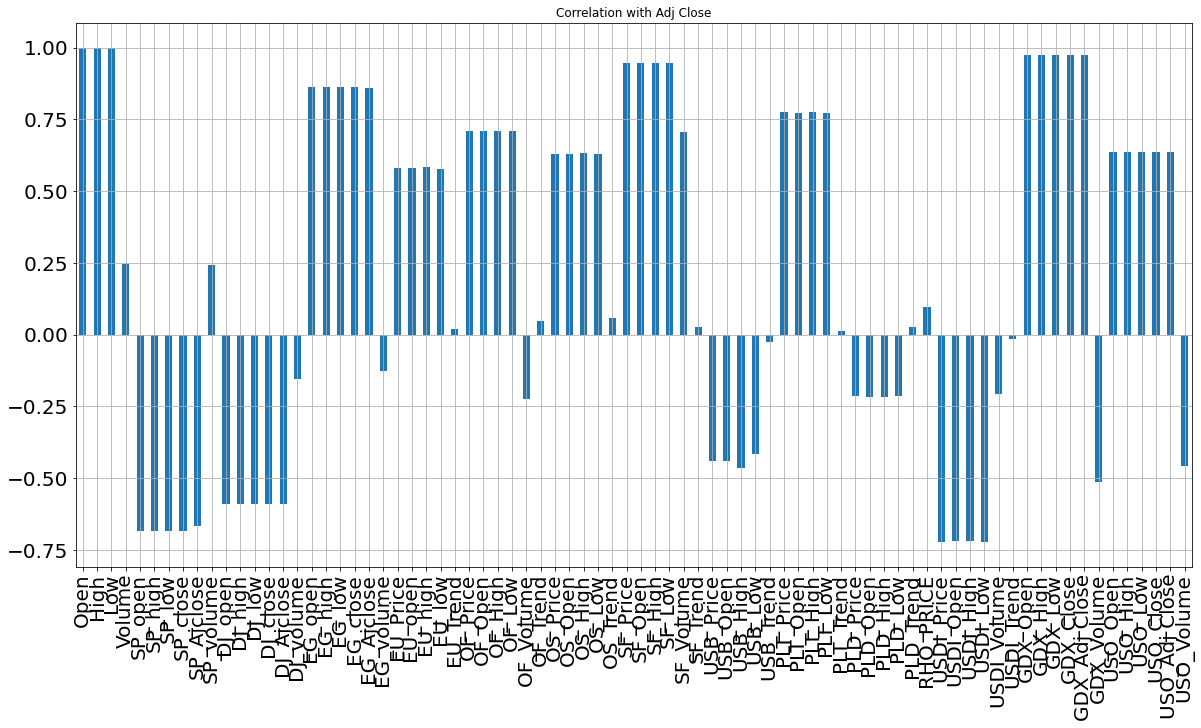

In [25]:
X.corrwith(df_final['Adj Close']).plot.bar(
        figsize = (20, 10), title = "Correlation with Adj Close", fontsize = 20,
        rot = 90, grid = True)

In [26]:
corr_matrix=df_final.corr()
coef=corr_matrix["Adj Close"].sort_values(ascending=False)

### Positively Correlated Variables

In [27]:
pos_corr=coef[coef>0]
pos_corr

Close            1.000000
Adj Close        1.000000
High             0.999535
Low              0.999532
Open             0.998976
GDX_Low          0.975561
GDX_Close        0.975459
GDX_High         0.975255
GDX_Adj Close    0.974980
GDX_Open         0.974824
SF_Low           0.947842
SF_Price         0.947420
SF_Open          0.945557
SF_High          0.945203
EG_low           0.863917
EG_open          0.862900
EG_close         0.862770
EG_high          0.861479
EG_Ajclose       0.859850
PLT_Price        0.775861
PLT_High         0.775481
PLT_Low          0.773993
PLT_Open         0.773760
OF_High          0.711334
OF_Price         0.710693
OF_Open          0.709096
OF_Low           0.708266
SF_Volume        0.706505
USO_Adj Close    0.635675
USO_Close        0.635675
USO_High         0.635311
USO_Open         0.635197
USO_Low          0.634732
OS_High          0.632001
OS_Price         0.630817
OS_Open          0.630046
OS_Low           0.629083
EU_high          0.582969
EU_Price    

### Negatively Correlated Variables

In [28]:
neg_corr=coef[coef<0]
neg_corr

USDI_Trend    -0.016641
USB_Trend     -0.025933
EG_volume     -0.126586
DJ_volume     -0.155526
USDI_Volume   -0.205954
PLD_Price     -0.213179
PLD_Low       -0.214919
PLD_Open      -0.216426
PLD_High      -0.217490
OF_Volume     -0.225436
USB_Low       -0.417352
USB_Open      -0.440822
USB_Price     -0.441347
USO_Volume    -0.456193
USB_High      -0.464116
GDX_Volume    -0.514616
DJ_low        -0.588157
DJ_Ajclose    -0.588411
DJ_close      -0.588411
DJ_high       -0.588778
DJ_open       -0.588800
SP_Ajclose    -0.666071
SP_low        -0.683750
SP_close      -0.684284
SP_open       -0.684618
SP_high       -0.684904
USDI_High     -0.720023
USDI_Open     -0.720140
USDI_Price    -0.721569
USDI_Low      -0.722078
Name: Adj Close, dtype: float64

## Technical Indicators

I will also use following technical indicators which I feel help as a feature for prediction of Gold price

**1. MACD :** The moving average convergence-divergence (MACD) is one of the most powerful and well-known indicators in technical analysis. The indicator is comprised of two exponential moving averages that help measure momentum in a security. The MACD is simply the difference between these two moving averages plotted against a centerline, where the centerline is the point at which the two moving averages are equal.

**2. RSI :** The relative strength index (RSI) is another well known momentum indicators that’s widely used in technical analysis. The indicator is commonly used to identify overbought and oversold conditions in a security with a range between 0 (oversold) and 100 (overbought).

**3. Simple Moving Average (SMA) :** simply takes the sum of all of the past closing prices over a time period and divides the result by the total number of prices used in the calculation. For example, a 10-day simple moving average takes the last ten closing prices and divides them by ten.

**4. Upper Band**

**5. Lower Band**

**6. DIFF**

**7. Open-Close**

**8. High-Low**

In [29]:
def calculate_MACD(df, nslow=26, nfast=12):
    emaslow = df.ewm(span=nslow, min_periods=nslow, adjust=True, ignore_na=False).mean()
    emafast = df.ewm(span=nfast, min_periods=nfast, adjust=True, ignore_na=False).mean()
    dif = emafast - emaslow
    MACD = dif.ewm(span=9, min_periods=9, adjust=True, ignore_na=False).mean()
    return dif, MACD

def calculate_RSI(df, periods=14):
    # wilder's RSI
    delta = df.diff()
    up, down = delta.copy(), delta.copy()

    up[up < 0] = 0
    down[down > 0] = 0

    rUp = up.ewm(com=periods,adjust=False).mean()
    rDown = down.ewm(com=periods, adjust=False).mean().abs()

    rsi = 100 - 100 / (1 + rUp / rDown)
    return rsi

def calculate_SMA(df, peroids=15):
    SMA = df.rolling(window=peroids, min_periods=peroids, center=False).mean()
    return SMA

def calculate_BB(df, peroids=15):
    STD = df.rolling(window=peroids,min_periods=peroids, center=False).std()
    SMA = calculate_SMA(df)
    upper_band = SMA + (2 * STD)
    lower_band = SMA - (2 * STD)
    return upper_band, lower_band

def calculate_stdev(df,periods=5):
    STDEV = df.rolling(periods).std()
    return STDEV

## Plotting Technical Indicators

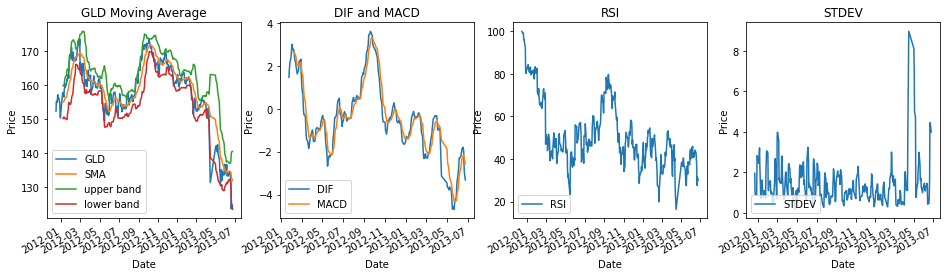

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

# Calculate Simple Moving Average for GLD
SMA_GLD = calculate_SMA(GLD_adj_close)

GLD_adj_close[:365].plot(title='GLD Moving Average',label='GLD', ax=axes[0])

SMA_GLD[:365].plot(label="SMA",ax=axes[0])


# Calculate Bollinger Bands for GLD
upper_band, lower_band = calculate_BB(GLD_adj_close)

upper_band[:365].plot(label='upper band', ax=axes[0])
lower_band[:365].plot(label='lower band', ax=axes[0])


# Calculate MACD for GLD
DIF, MACD = calculate_MACD(GLD_adj_close)

DIF[:365].plot(title='DIF and MACD',label='DIF', ax=axes[1])
MACD[:365].plot(label='MACD', ax=axes[1])

# Calculate RSI for GLD
RSI = calculate_RSI(GLD_adj_close)
RSI[:365].plot(title='RSI',label='RSI', ax=axes[2])

# Calculating Standard deviation for GLD
STDEV= calculate_stdev(GLD_adj_close)
STDEV[:365].plot(title='STDEV',label='STDEV', ax=axes[3])

Open_Close=df_final.Open - df_final.Close

High_Low=df_final.High-df_final.Low

axes[0].set_ylabel('Price')
axes[1].set_ylabel('Price')
axes[2].set_ylabel('Price')
axes[3].set_ylabel('Price')



axes[0].legend(loc='lower left')
axes[1].legend(loc='lower left')
axes[2].legend(loc='lower left')
axes[3].legend(loc='lower left')

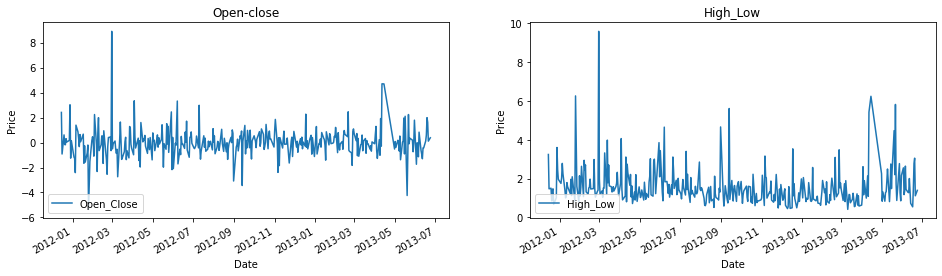

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
Open_Close=df_final.Open - df_final.Close
Open_Close[:365].plot(title='Open-close',label='Open_Close', ax=axes[0])

High_Low=df_final.High-df_final.Low
High_Low[:365].plot(title='High_Low',label='High_Low', ax=axes[1])
axes[0].set_ylabel('Price')
axes[1].set_ylabel('Price')




axes[0].legend(loc='lower left')
axes[1].legend(loc='lower left')


In [32]:
test = df_final
test['SMA'] = SMA_GLD
test['Upper_band'] = upper_band
test['Lower_band'] = lower_band
test['DIF'] = DIF
test['MACD'] = MACD
test['RSI'] = RSI
test['STDEV'] = STDEV
test['Open_Close']=Open_Close
test['High_Low']=High_Low


# Dropping first 33 records from the data as it has null values because of introduction of technical indicators
test = test[33:]

# Target column
target_adj_close = pd.DataFrame(test['Adj Close'])


display(test.head())

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,USO_Volume,SMA,Upper_band,Lower_band,DIF,MACD,RSI,STDEV,Open_Close,High_Low
Date,,,,,,,,,,,,,,,,,,,,,
2012-02-06,166.960007,167.679993,166.610001,167.179993,167.179993,8807400,133.979996,134.509995,133.830002,134.449997,...,6126100,165.198666,173.018365,157.378968,2.724443,2.641891,70.144545,1.562107,-0.219986,1.069992
2012-02-07,167.380005,170.089996,167.149994,169.699997,169.699997,11614300,134.169998,135.020004,133.639999,134.789993,...,10237000,165.894667,173.296304,158.493029,2.754381,2.667095,73.152763,1.594111,-2.319992,2.940002
2012-02-08,169.259995,169.960007,167.500000,168.500000,168.500000,10655500,134.860001,135.220001,134.309998,135.190002,...,9045800,166.428000,173.297467,159.558533,2.655845,2.664634,69.576023,1.575718,0.759995,2.460007
2012-02-09,170.009995,170.369995,167.669998,168.020004,168.020004,16085200,135.410004,135.589996,134.559998,135.360001,...,4663500,166.856000,173.217507,160.494493,2.511947,2.631843,68.148015,0.965153,1.989991,2.699997
2012-02-10,166.490005,167.639999,166.330002,167.139999,167.139999,10326800,134.160004,134.470001,133.839996,134.360001,...,6008600,167.250666,172.795817,161.705515,2.303734,2.562404,65.507009,1.059963,-0.649994,1.309997


In [33]:
df_final.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SP_open',
       'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume', 'DJ_open',
       'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume', 'EG_open',
       'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume', 'EU_Price',
       'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price', 'OF_Open',
       'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price', 'OS_Open',
       'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open', 'SF_High',
       'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open', 'USB_High',
       'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low',
       'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_High', 'USO

In this step I would segregate feature and target variables. I will not use Close feature of GLD ETF and will use Adjusted Close of Gold ETF as target variable 

In [34]:
# selecting Feature Columns
feature_columns = ['Open', 'High', 'Low', 'Volume','SP_open','SP_high','SP_low','SP_Ajclose','SP_volume','DJ_open','DJ_high', 'DJ_low',  'DJ_Ajclose', 'DJ_volume', 'EG_open','EG_high', 'EG_low',  
                   'EG_Ajclose', 'EG_volume', 'EU_Price','EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price','OF_Open','OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price', 'OS_Open','OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open', 'SF_High',
                   'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open', 'USB_High','USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low',
                    'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low','PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
                     'USDI_Low', 'USDI_Volume', 'USDI_Trend','GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_High', 'USO_Low', 'USO_Close', 'USO_Adj Close', 'USO_Volume','SMA', 'Upper_band', 'Lower_band', 'DIF', 'MACD','RSI','STDEV','Open_Close', 'High_Low']



## Normalizing the data

In this step I would perform feature scaling/normalization of feature variables using sklearn's MinMaxScaler function.

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)
feature_minmax_transform.head()

,Open,High,Low,Volume,SP_open,SP_high,SP_low,SP_Ajclose,SP_volume,DJ_open,...,USO_Volume,SMA,Upper_band,Lower_band,DIF,MACD,RSI,STDEV,Open_Close,High_Low
Date,,,,,,,,,,,,,,,,,,,,,
2012-02-06,0.913669,0.912561,0.913193,0.079151,0.037098,0.034927,0.040627,0.028113,0.166542,0.051563,...,0.046608,0.906189,0.961240,0.821988,0.893394,0.911893,0.807275,0.167603,0.415010,0.091684
2012-02-07,0.919480,0.945539,0.920622,0.109560,0.038247,0.038015,0.039473,0.029765,0.224602,0.050453,...,0.084243,0.916193,0.965092,0.837893,0.896986,0.915193,0.852413,0.171198,0.280308,0.291045
2012-02-08,0.945490,0.943760,0.925437,0.099173,0.042423,0.039225,0.043542,0.031707,0.232599,0.051907,...,0.073338,0.923859,0.965108,0.853105,0.885164,0.914871,0.798744,0.169132,0.477870,0.239873
2012-02-09,0.955866,0.949370,0.927775,0.157998,0.045752,0.041465,0.045060,0.032533,0.251876,0.053171,...,0.033218,0.930011,0.964000,0.866467,0.867900,0.910578,0.777317,0.100533,0.556766,0.265458
2012-02-10,0.907167,0.912014,0.909341,0.095612,0.038187,0.034685,0.040687,0.027676,0.292146,0.053519,...,0.045532,0.935684,0.958155,0.883757,0.842920,0.901486,0.737688,0.111185,0.387428,0.117271


In [36]:
display(feature_minmax_transform.head())
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)

# Shift target array because we want to predict the n + 1 day value


target_adj_close = target_adj_close.shift(-1)
validation_y = target_adj_close[-90:-1]
target_adj_close = target_adj_close[:-90]

# Taking last 90 rows of data to be validation set
validation_X = feature_minmax_transform[-90:-1]
feature_minmax_transform = feature_minmax_transform[:-90]
display(validation_X.tail())
display(validation_y.tail())

print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)
display(target_adj_close.tail())

,Open,High,Low,Volume,SP_open,SP_high,SP_low,SP_Ajclose,SP_volume,DJ_open,...,USO_Volume,SMA,Upper_band,Lower_band,DIF,MACD,RSI,STDEV,Open_Close,High_Low
Date,,,,,,,,,,,,,,,,,,,,,
2012-02-06,0.913669,0.912561,0.913193,0.079151,0.037098,0.034927,0.040627,0.028113,0.166542,0.051563,...,0.046608,0.906189,0.961240,0.821988,0.893394,0.911893,0.807275,0.167603,0.415010,0.091684
2012-02-07,0.919480,0.945539,0.920622,0.109560,0.038247,0.038015,0.039473,0.029765,0.224602,0.050453,...,0.084243,0.916193,0.965092,0.837893,0.896986,0.915193,0.852413,0.171198,0.280308,0.291045
2012-02-08,0.945490,0.943760,0.925437,0.099173,0.042423,0.039225,0.043542,0.031707,0.232599,0.051907,...,0.073338,0.923859,0.965108,0.853105,0.885164,0.914871,0.798744,0.169132,0.477870,0.239873
2012-02-09,0.955866,0.949370,0.927775,0.157998,0.045752,0.041465,0.045060,0.032533,0.251876,0.053171,...,0.033218,0.930011,0.964000,0.866467,0.867900,0.910578,0.777317,0.100533,0.556766,0.265458
2012-02-10,0.907167,0.912014,0.909341,0.095612,0.038187,0.034685,0.040687,0.027676,0.292146,0.053519,...,0.045532,0.935684,0.958155,0.883757,0.842920,0.901486,0.737688,0.111185,0.387428,0.117271


Shape of features :  (1685, 84)
Shape of target :  (1685, 1)


,Open,High,Low,Volume,SP_open,SP_high,SP_low,SP_Ajclose,SP_volume,DJ_open,...,USO_Volume,SMA,Upper_band,Lower_band,DIF,MACD,RSI,STDEV,Open_Close,High_Low
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-21,0.252767,0.249863,0.252304,0.131396,0.719499,0.732264,0.685249,0.721173,0.474541,0.731087,...,0.346662,0.221370,0.217009,0.228105,0.658641,0.648503,0.687759,0.071990,0.459268,0.050107
2018-12-24,0.258024,0.262042,0.266061,0.089215,0.672900,0.678571,0.650574,0.685607,0.249183,0.693452,...,0.188254,0.225663,0.221905,0.231591,0.673309,0.655308,0.771343,0.103731,0.400256,0.038380
2018-12-26,0.272551,0.273810,0.266061,0.138587,0.654321,0.710896,0.647477,0.751818,0.397651,0.662258,...,0.365682,0.228778,0.225424,0.234153,0.680140,0.662243,0.728779,0.105509,0.490699,0.130064
2018-12-27,0.271859,0.272441,0.273903,0.112378,0.694263,0.723668,0.679055,0.762387,0.330444,0.714615,...,0.325400,0.232083,0.233069,0.232846,0.692906,0.670576,0.782400,0.071859,0.429121,0.058636
2018-12-28,0.275042,0.274904,0.281882,0.058103,0.736686,0.742494,0.724540,0.760598,0.261258,0.754292,...,0.199288,0.235840,0.241125,0.232010,0.706157,0.680136,0.808642,0.092629,0.412444,0.015992


,Adj Close
Date,
2018-12-21,120.019997
2018-12-24,119.660004
2018-12-26,120.570000
2018-12-27,121.059998
2018-12-28,121.250000



 -----After process------ 

Shape of features :  (1595, 84)
Shape of target :  (1595, 1)


,Adj Close
Date,
2018-08-13,113.070000
2018-08-14,111.099998
2018-08-16,112.129997
2018-08-17,112.690002
2018-08-20,113.019997


## Train Test Split

In this step we would perform Train test split using sklearn's Timeseries split

In [37]:
ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()
       

In [38]:
X_train.shape

(1450, 84)

In [39]:
X_test.shape

(145, 84)

In [40]:
y_train.shape

(1450,)

In [41]:
y_test.shape

(145,)

In [42]:
def validate_result(model, model_name):
    predicted = model.predict(validation_X)
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    print('RMSE: ', RSME_score)
    
    R2_score = r2_score(validation_y, predicted)
    print('R2 score: ', R2_score)

    plt.plot(validation_y.index, predicted,'r', label='Predict')
    plt.plot(validation_y.index, validation_y,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()

## Model Building

### 1. Benchmark Model :
       I will use Decision Tree Regressor with default parameter as my Benchmark model for the project.

RMSE:  1.2166871700124942
R2 score:  0.6590361406118342


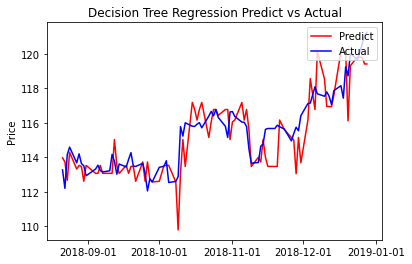

In [43]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)

benchmark_dt=dt.fit(X_train, y_train)

validate_result(benchmark_dt, 'Decision Tree Regression')

## Solution Model 

### Support Vector Regressor (SVR)

RMSE:  0.8136915781869215
R2 score:  0.8474998982807777


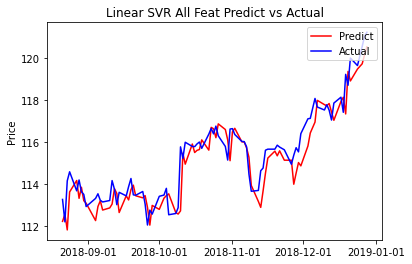

In [44]:
# Save all soultion models
solution_models = {}
# SVR with  linear Kernel
svr_lin = SVR(kernel='linear')
linear_svr_clf_feat = svr_lin.fit(X_train,y_train)
validate_result(linear_svr_clf_feat,'Linear SVR All Feat')


### Hyperparameter Tuning
In this step I will tune two parameters of SVR C and epsilon to see if the model shows any improvement.

RMSE:  0.7417766706111801
R2 score:  0.8732649232935971


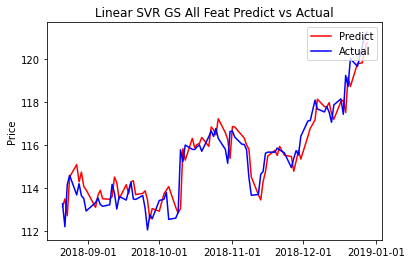

In [45]:
linear_svr_parameters = {
    'C':[0.5, 1.0, 10.0, 50.0],
    'epsilon':[0, 0.1, 0.5, 0.7, 0.9],
}

lsvr_grid_search_feat = GridSearchCV(estimator=linear_svr_clf_feat,
                           param_grid=linear_svr_parameters,
                           cv=ts_split,
)

lsvr_grid_search_feat.fit(X_train, y_train)

validate_result(lsvr_grid_search_feat,'Linear SVR GS All Feat')


As we have seen using gridsearch on SVR we get significant improvement in R2 score and RMSE also came down so we will save this as our first solution model 

In [46]:

solution_models['SVR All Feat'] = lsvr_grid_search_feat

## Solution Model : Random Forest

RMSE:  0.8078828885891266
R2 score:  0.8496694277726002


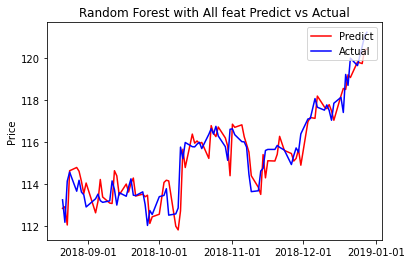

In [47]:
rf_cl = RandomForestRegressor(n_estimators=50, random_state=0)
random_forest_clf_feat = rf_cl.fit(X_train,y_train)
validate_result(random_forest_clf_feat,'Random Forest with All feat')

## Hyper parameter Tuning
In this I will tune 3 parameters of Random forest which are n_estimators,max_features,max_depth

In [48]:
random_forest_parameters = {
    'n_estimators':[10,15,20, 50, 100],
    'max_features':['auto','sqrt','log2'],
    'max_depth':[2, 3, 5, 7,10],
}

grid_search_RF_feat = GridSearchCV(estimator=random_forest_clf_feat,
                           param_grid=random_forest_parameters,
                           cv=ts_split,
)

grid_search_RF_feat.fit(X_train, y_train)


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=10),
             estimator=RandomForestRegressor(n_estimators=50, random_state=0),
             param_grid={'max_depth': [2, 3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 15, 20, 50, 100]})

{'max_depth': 7, 'max_features': 'auto', 'n_estimators': 20}
RMSE:  0.8221622242794646
R2 score:  0.8443082757939838


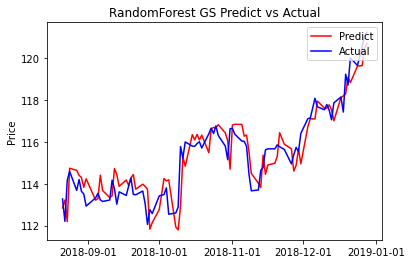

In [49]:
print(grid_search_RF_feat.best_params_)
validate_result(grid_search_RF_feat,'RandomForest GS')

As we have seen, Random forest with default parameters performed better than tuned Random forest model.So, we will include random forest with default parameters as our second solution model.

In [50]:
solution_models['Random_Forest with Feat'] = random_forest_clf_feat

## Solution Model : Lasso and Ridge

RMSE:  0.7117047240324116
R2 score:  0.8833324203076942


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47.274631125088035, tolerance: 47.12975638074313
  positive)


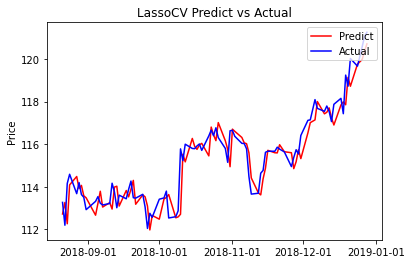

RMSE:  0.7186272523103391
R2 score:  0.8810518047764179


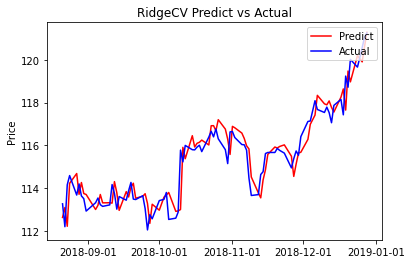

In [51]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

lasso_clf = LassoCV(n_alphas=1000, max_iter=3000, random_state=0)
ridge_clf = RidgeCV(gcv_mode='auto')

lasso_clf_feat = lasso_clf.fit(X_train,y_train)
validate_result(lasso_clf_feat,'LassoCV')
solution_models['LassoCV All feat'] = lasso_clf_feat

ridge_clf_feat = ridge_clf.fit(X_train,y_train)
validate_result(ridge_clf_feat,'RidgeCV')
solution_models['RidgeCV All Feat'] = ridge_clf_feat

## Solution Model : Bayesian Ridge

RMSE:  0.7195639601669016
R2 score:  0.8807415122717521


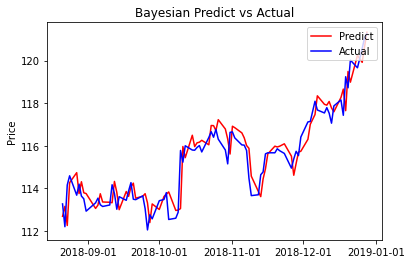

In [52]:
from sklearn import linear_model
bay = linear_model.BayesianRidge()
bay_feat = bay.fit(X_train,y_train)
validate_result(bay_feat,'Bayesian')
solution_models['Bay All Feat'] = bay_feat

## Solution Model : Gradient Boosting Regressor

RMSE:  0.8094931831292806
R2 score:  0.8490695443986875


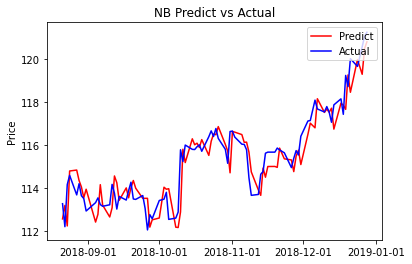

In [53]:
from sklearn.ensemble import GradientBoostingRegressor
regr =GradientBoostingRegressor(n_estimators=70, learning_rate=0.1,max_depth=4, random_state=0, loss='ls')
GB_feat = regr.fit(X_train,y_train)
validate_result(GB_feat,'NB')
solution_models['GB All Feat'] = GB_feat

## Solution Model : Stochastic Gradient Descent (SGD)

RMSE:  0.8913958571441506
R2 score:  0.8169828812329702


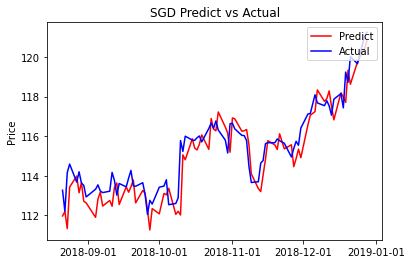

In [54]:
from sklearn.linear_model import SGDRegressor
sgd =SGDRegressor(max_iter=1000, tol=1e-3,loss='squared_epsilon_insensitive',penalty='l1',alpha=0.1)
sgd_feat = sgd.fit(X_train,y_train)
validate_result(sgd_feat,'SGD')
solution_models['SGD All Feat'] = sgd_feat

## Model Review
In this step, we will review benchmark model and all the solution model based on evaluation metrics i.e, RMSE and R2 score

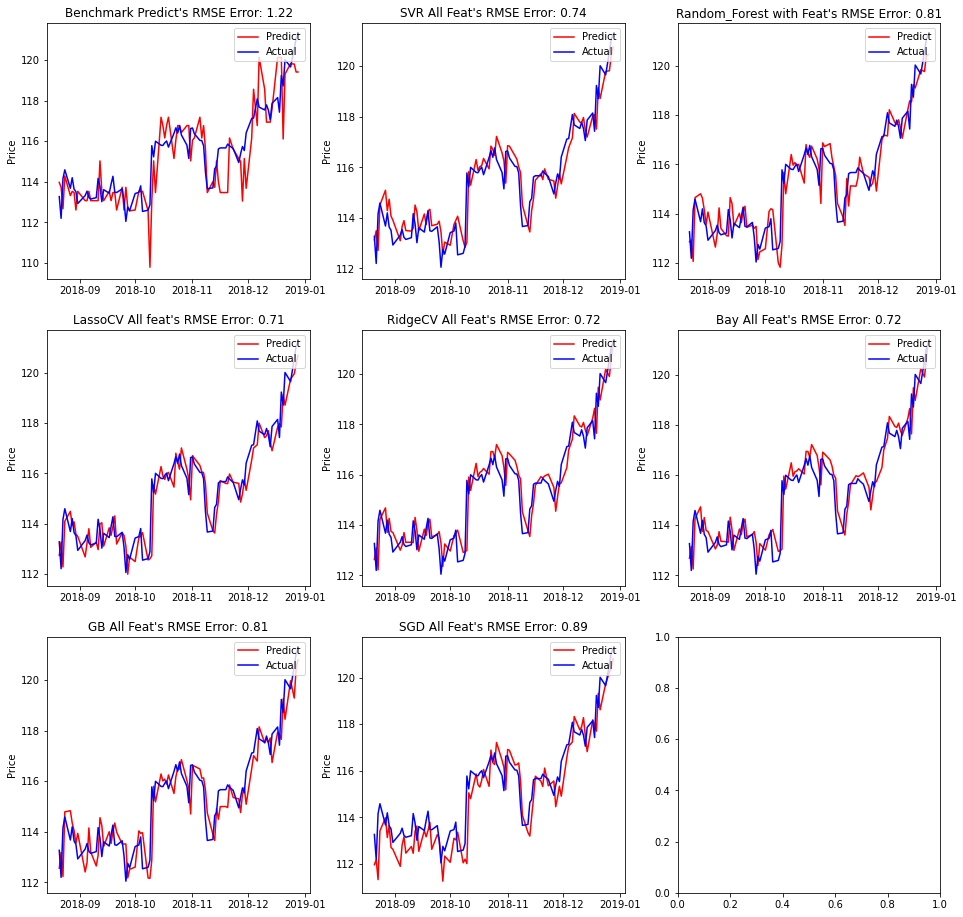

In [55]:
RMSE_scores = {}
def model_review(models):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 16))

    #plot benchmark model
    benchmark_predicted = benchmark_dt.predict(validation_X)
    benchmark_RSME_score = np.sqrt(mean_squared_error(validation_y, benchmark_predicted))
    RMSE_scores['Benchmark'] = benchmark_RSME_score
    
    axes[0,0].plot(validation_y.index, benchmark_predicted,'r', label='Predict')
    axes[0,0].plot(validation_y.index, validation_y,'b', label='Actual')
    axes[0,0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    axes[0,0].xaxis.set_major_locator(mdates.MonthLocator())
    axes[0,0].set_ylabel('Price')
    axes[0,0].set_title("Benchmark Predict's RMSE Error: " +"{0:.2f}".format(benchmark_RSME_score))
    axes[0,0].legend(loc='upper right')
    
    #plot block
    ax_x = 0
    ax_y = 1
    #plot solution model
    for name, model in models.items():
        predicted = model.predict(validation_X)
        RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))

           
        axes[ax_x][ax_y].plot(validation_y.index, predicted,'r', label='Predict')
        axes[ax_x][ax_y].plot(validation_y.index, validation_y,'b', label='Actual')
        axes[ax_x][ax_y].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        axes[ax_x][ax_y].xaxis.set_major_locator(mdates.MonthLocator())
        axes[ax_x][ax_y].set_ylabel('Price')
        axes[ax_x][ax_y].set_title(name + "'s RMSE Error: " +"{0:.2f}".format(RSME_score))
        axes[ax_x][ax_y].legend(loc='upper right')
        RMSE_scores[name] = RSME_score
        if ax_x <=2:
            if ax_y < 2:
                ax_y += 1
            else:
                ax_x += 1
                ax_y = 0
    plt.show()

model_review(solution_models)

### Comparison of RMSE of Benchmark and all Solution Models

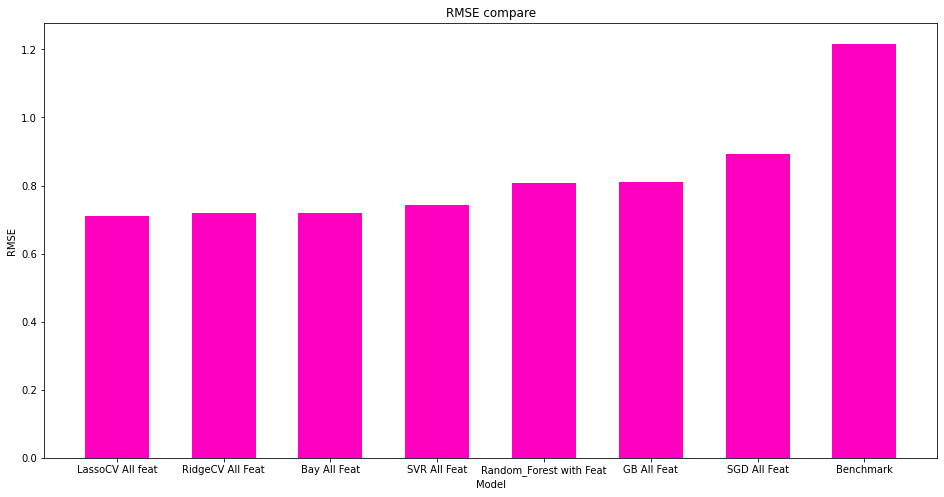

In [56]:

model_names = []
model_values = []
for name, value in RMSE_scores.items():
    model_names.append(name)
    model_values.append(value)

model_values = np.array(model_values)
model_names = np.array(model_names)

indices = np.argsort(model_values)
columns = model_names[indices[:8]]
values = model_values[indices][:8]

fig = plt.figure(figsize = (16,8))
plt.bar(np.arange(8), values ,width = 0.6, align="center", color = '#ff00c1')
plt.xticks(np.arange(8), columns)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE compare')   
plt.show()

## Feature Selection

In this step we will select supporting features using sklearn's **SelectFromModel** library using Lasso regressor as it has lowest RMSE.

In [57]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(lasso_clf_feat)
sfm.fit(feature_minmax_transform, target_adj_close.values.ravel())
display(feature_minmax_transform.head())
sup = sfm.get_support()
zipped = zip(feature_minmax_transform,sup)
print(*zipped)

,Open,High,Low,Volume,SP_open,SP_high,SP_low,SP_Ajclose,SP_volume,DJ_open,...,USO_Volume,SMA,Upper_band,Lower_band,DIF,MACD,RSI,STDEV,Open_Close,High_Low
Date,,,,,,,,,,,,,,,,,,,,,
2012-02-06,0.913669,0.912561,0.913193,0.079151,0.037098,0.034927,0.040627,0.028113,0.166542,0.051563,...,0.046608,0.906189,0.961240,0.821988,0.893394,0.911893,0.807275,0.167603,0.415010,0.091684
2012-02-07,0.919480,0.945539,0.920622,0.109560,0.038247,0.038015,0.039473,0.029765,0.224602,0.050453,...,0.084243,0.916193,0.965092,0.837893,0.896986,0.915193,0.852413,0.171198,0.280308,0.291045
2012-02-08,0.945490,0.943760,0.925437,0.099173,0.042423,0.039225,0.043542,0.031707,0.232599,0.051907,...,0.073338,0.923859,0.965108,0.853105,0.885164,0.914871,0.798744,0.169132,0.477870,0.239873
2012-02-09,0.955866,0.949370,0.927775,0.157998,0.045752,0.041465,0.045060,0.032533,0.251876,0.053171,...,0.033218,0.930011,0.964000,0.866467,0.867900,0.910578,0.777317,0.100533,0.556766,0.265458
2012-02-10,0.907167,0.912014,0.909341,0.095612,0.038187,0.034685,0.040687,0.027676,0.292146,0.053519,...,0.045532,0.935684,0.958155,0.883757,0.842920,0.901486,0.737688,0.111185,0.387428,0.117271


('Open', True) ('High', True) ('Low', True) ('Volume', False) ('SP_open', False) ('SP_high', False) ('SP_low', False) ('SP_Ajclose', False) ('SP_volume', False) ('DJ_open', False) ('DJ_high', False) ('DJ_low', False) ('DJ_Ajclose', False) ('DJ_volume', False) ('EG_open', False) ('EG_high', False) ('EG_low', False) ('EG_Ajclose', False) ('EG_volume', False) ('EU_Price', False) ('EU_open', False) ('EU_high', False) ('EU_low', False) ('EU_Trend', False) ('OF_Price', False) ('OF_Open', False) ('OF_High', False) ('OF_Low', False) ('OF_Volume', False) ('OF_Trend', True) ('OS_Price', False) ('OS_Open', False) ('OS_High', False) ('OS_Low', False) ('OS_Trend', True) ('SF_Price', False) ('SF_Open', False) ('SF_High', False) ('SF_Low', False) ('SF_Volume', True) ('SF_Trend', True) ('USB_Price', False) ('USB_Open', False) ('USB_High', True) ('USB_Low', False) ('USB_Trend', True) ('PLT_Price', False) ('PLT_Open', False) ('PLT_High', False) ('PLT_Low', False) ('PLT_Trend', True) ('PLD_Price', False)

In [58]:
# Selecting Features which supports Model building process

feature_selected = feature_minmax_transform[['Open','High','Low','OF_Trend','USB_Trend','PLT_Trend','USDI_Price','GDX_Close','SMA','Upper_band','RSI','Open_Close']]
feature_selected_validation_X = validation_X[['Open','High','Low','OF_Trend','USB_Trend','PLT_Trend','USDI_Price','GDX_Close','SMA','Upper_band','RSI','Open_Close']]
display(feature_selected.head())
display(feature_selected_validation_X.head())

,Open,High,Low,OF_Trend,USB_Trend,PLT_Trend,USDI_Price,GDX_Close,SMA,Upper_band,RSI,Open_Close
Date,,,,,,,,,,,,
2012-02-06,0.913669,0.912561,0.913193,1.0,0.0,0.0,0.035457,0.974365,0.906189,0.961240,0.807275,0.415010
2012-02-07,0.919480,0.945539,0.920622,1.0,1.0,1.0,0.015007,0.967677,0.916193,0.965092,0.852413,0.280308
2012-02-08,0.945490,0.943760,0.925437,1.0,1.0,1.0,0.017368,0.960098,0.923859,0.965108,0.798744,0.477870
2012-02-09,0.955866,0.949370,0.927775,1.0,1.0,0.0,0.014087,0.953633,0.930011,0.964000,0.777317,0.556766
2012-02-10,0.907167,0.912014,0.909341,0.0,0.0,1.0,0.037058,0.936692,0.935684,0.958155,0.737688,0.387428


,Open,High,Low,OF_Trend,USB_Trend,PLT_Trend,USDI_Price,GDX_Close,SMA,Upper_band,RSI,Open_Close
Date,,,,,,,,,,,,
2018-08-21,0.163946,0.165709,0.167974,1.0,1.0,0.0,0.674324,0.143781,0.169137,0.179197,0.312663,0.413085
2018-08-22,0.172524,0.171045,0.176640,1.0,0.0,0.0,0.670362,0.146901,0.166531,0.173311,0.340181,0.436818
2018-08-23,0.162701,0.162698,0.162746,0.0,1.0,0.0,0.691652,0.133526,0.163714,0.170454,0.271060,0.459910
2018-08-24,0.170587,0.183771,0.178566,1.0,0.0,1.0,0.670842,0.144449,0.163369,0.169642,0.456216,0.370750
2018-08-27,0.182623,0.188697,0.191085,1.0,1.0,1.0,0.655675,0.151806,0.163053,0.168648,0.490053,0.398974


## Train Test Split

In [59]:
 for train_index, test_index in ts_split.split(feature_selected):
        X_train, X_test = feature_selected[:len(train_index)], feature_selected[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()
     

## validation Feature Selected Benchmark & Solution Model

In [60]:
def feature_selected_validate_result(model, model_name):
    predicted = model.predict(feature_selected_validation_X)
    
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    R2_score = r2_score(validation_y, predicted)
    
    print(model_name + '\n')
    print('RMSE: ', RSME_score)
    print('R2 score: ', R2_score)
    print('----------------------')


print('---------Benchmark-------------')  
dt = DecisionTreeRegressor(random_state=0)
benchmark_dt_fs = dt.fit(X_train,y_train)
feature_selected_validate_result(benchmark_dt_fs, 'Decision Tree')

feature_selected_solution_models = {}
 
print('--------Solution Models--------------')  
# Random Forest
random_forest_clf_fs = RandomForestRegressor(random_state=0,
                                             max_depth=3,
                                             max_features='auto',
                                             n_estimators=10
)
random_forest_parameters = {
    'n_estimators':[10, 50, 100],
    'max_features':['auto','sqrt','log2'],
    'max_depth':[3, 5, 7],
}
grid_search_RF_fs = GridSearchCV(estimator=random_forest_clf_fs,
                           param_grid=random_forest_parameters,
                           cv=ts_split,
)
grid_search_RF_fs.fit(X_train, y_train)
feature_selected_validate_result(grid_search_RF_fs,'Feature selected RandomForest GS')
feature_selected_solution_models['FS_RandomForest'] = grid_search_RF_fs

# Linear SVR
linear_svr_fs = SVR(
                          C=50.0,
                          epsilon=0,kernel='linear')
linear_svr_clf_fs = linear_svr_fs.fit(X_train,y_train)
feature_selected_validate_result(linear_svr_clf_fs,'Feature selected LSVR')
feature_selected_solution_models['FS_LSVR'] = linear_svr_clf_fs


# lasso
lasso_fs = LassoCV(n_alphas=1000, max_iter=3000, random_state=0)
lasso_clf_fs = lasso_fs.fit(X_train,y_train)
feature_selected_validate_result(lasso_clf_fs,'Feature selected LassoCV')
feature_selected_solution_models['FS_Lasso'] = lasso_clf_fs

# Ridge
ridge_fs = RidgeCV(gcv_mode='auto')
ridge_clf_fs = ridge_fs.fit(X_train,y_train)
feature_selected_validate_result(ridge_clf_fs,'Feature selected RidgeCV')
feature_selected_solution_models['FS_RidgeCV'] = ridge_clf_fs

# bayesian ridge
bay = linear_model.BayesianRidge()
bay_feat_fs = bay.fit(X_train,y_train)
feature_selected_validate_result(bay_feat_fs,'Feature selected BayRidge')
feature_selected_solution_models['Bay_Ridge'] = bay_feat_fs

#Gradient Boosting
regr =GradientBoostingRegressor(n_estimators=70, learning_rate=0.1,max_depth=4, random_state=0, loss='ls')
GB_fs = regr.fit(X_train,y_train)
feature_selected_validate_result(GB_fs,'Feature selected GB')
feature_selected_solution_models['GB_FS'] = GB_fs

#SGD

sgd =SGDRegressor(max_iter=1000, tol=1e-3,loss='squared_epsilon_insensitive',penalty='l1',alpha=0.1)
sgd_fs = sgd.fit(X_train,y_train)
feature_selected_validate_result(sgd_fs,'Feature selected SGD')
feature_selected_solution_models['sgd_fs'] = sgd_fs


---------Benchmark-------------
Decision Tree

RMSE:  1.3140710969641578
R2 score:  0.6022701215418467
----------------------
--------Solution Models--------------
Feature selected RandomForest GS

RMSE:  0.8052237275992113
R2 score:  0.850657430616824
----------------------
Feature selected LSVR

RMSE:  0.7160621902397207
R2 score:  0.8818994346855501
----------------------
Feature selected LassoCV

RMSE:  0.7092538002994215
R2 score:  0.8841345815790794
----------------------
Feature selected RidgeCV

RMSE:  0.7179254848438182
R2 score:  0.8812840064235162
----------------------
Feature selected BayRidge

RMSE:  0.7125419009126744
R2 score:  0.8830577871840586
----------------------
Feature selected GB

RMSE:  0.8223529442134774
R2 score:  0.8442360346752706
----------------------
Feature selected SGD

RMSE:  0.8438631622961815
R2 score:  0.8359808530431841
----------------------


## Model Review

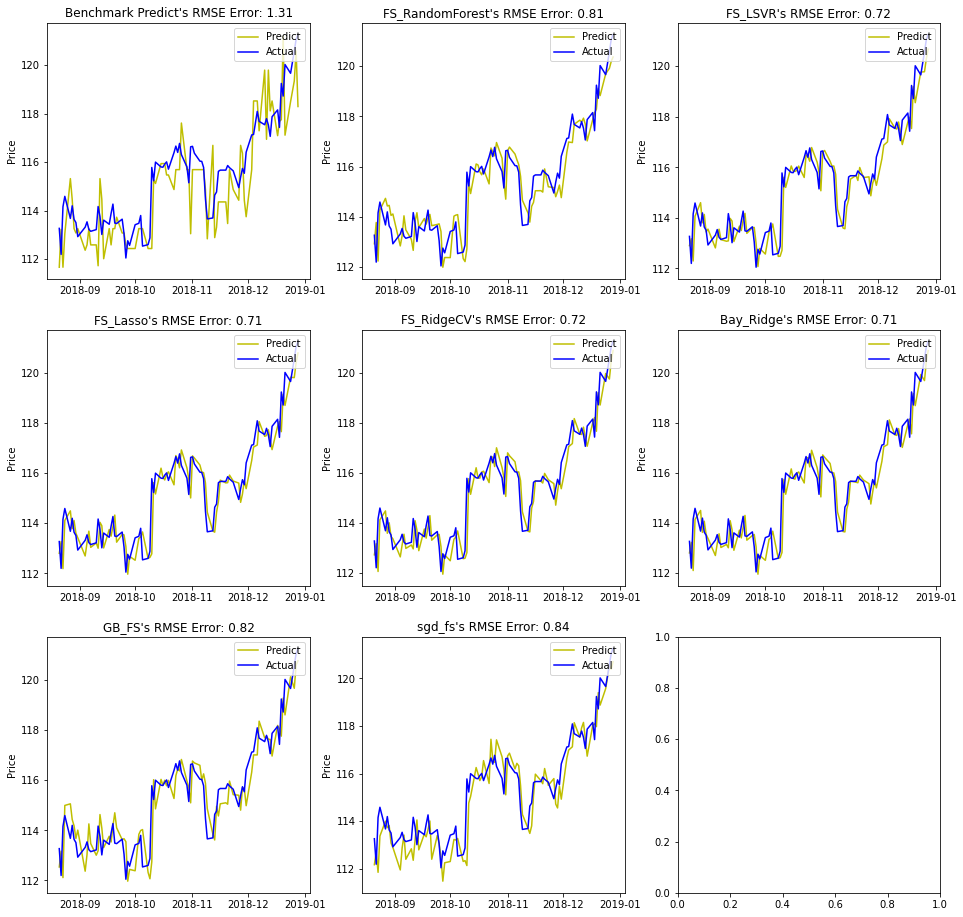

In [61]:
FS_RMSE_scores = {}

def fs_model_review(models):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 16))

    #plot benchmark model
    benchmark_dt_predicted = benchmark_dt_fs.predict(feature_selected_validation_X)
    benchmark_RSME_score = np.sqrt(mean_squared_error(validation_y, benchmark_dt_predicted))
    FS_RMSE_scores['Benchmark'] = benchmark_RSME_score
    
    axes[0,0].plot(validation_y.index, benchmark_dt_predicted,'y', label='Predict')
    axes[0,0].plot(validation_y.index, validation_y,'b', label='Actual')
    axes[0,0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    axes[0,0].xaxis.set_major_locator(mdates.MonthLocator())
    axes[0,0].set_ylabel('Price')
    axes[0,0].set_title("Benchmark Predict's RMSE Error: " +"{0:.2f}".format(benchmark_RSME_score))
    axes[0,0].legend(loc='upper right')
    
    #plot block
    ax_x = 0
    ax_y = 1
    #plot solution model
    for name, model in models.items():
        predicted = model.predict(feature_selected_validation_X)
        RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))

        R2_score = r2_score(validation_y, predicted)
    
        axes[ax_x][ax_y].plot(validation_y.index, predicted,'y', label='Predict')
        axes[ax_x][ax_y].plot(validation_y.index, validation_y,'b', label='Actual')
        axes[ax_x][ax_y].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        axes[ax_x][ax_y].xaxis.set_major_locator(mdates.MonthLocator())
        axes[ax_x][ax_y].set_ylabel('Price')
        axes[ax_x][ax_y].set_title(name + "'s RMSE Error: " +"{0:.2f}".format(RSME_score))
        axes[ax_x][ax_y].legend(loc='upper right')
        FS_RMSE_scores[name] = RSME_score
        if ax_x <=2:
            if ax_y < 2:
                ax_y += 1
            else:
                ax_x += 1
                ax_y = 0
    plt.show()

fs_model_review(feature_selected_solution_models)

### Comparison of RMSE of Feature selected models and Original Features model

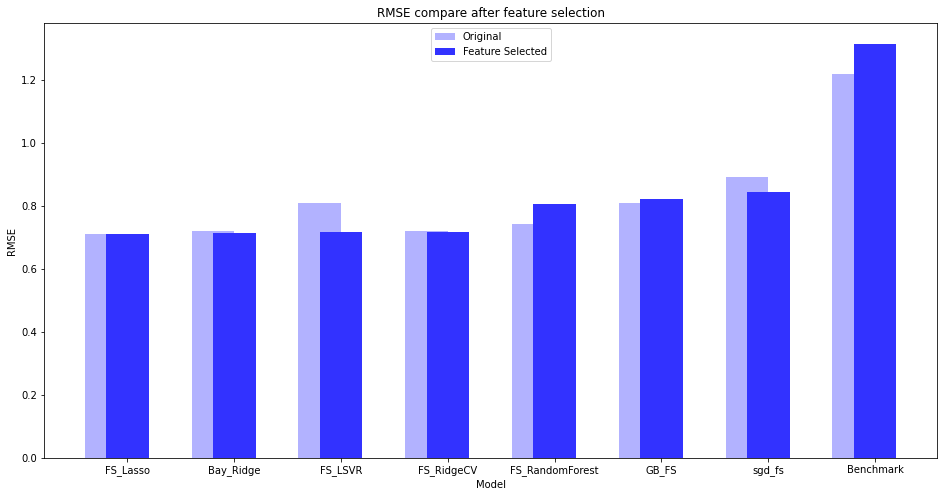

In [62]:

fs_model_names = []
fs_model_values = []
for name, value in FS_RMSE_scores.items():
    fs_model_names.append(name)
    fs_model_values.append(value)

fs_model_values = np.array(fs_model_values)
fs_model_names = np.array(fs_model_names)

fs_indices = np.argsort(fs_model_values)
fs_columns = fs_model_names[fs_indices[:8]]
fs_values = fs_model_values[fs_indices][:8]
origin_values = model_values[fs_indices][:8]

fig = plt.figure(figsize = (16,8))
plt.bar(np.arange(8) - 0.2 , origin_values ,width = 0.4, align="center", color = '#b2b2ff', label = "Original")
plt.bar(np.arange(8), fs_values ,width = 0.4, align="center", color = '#3232ff', label = "Feature Selected")
plt.xticks(np.arange(8), fs_columns)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE compare after feature selection')
plt.legend(loc = 'upper center')
plt.show()


**As we have seen from the above plot 3 Feature selected models performs better in RMSE error reduction and Feature selected Linear SVR is the best as it has RMSE of 0.716 in feature selected model and 0.741 with all features model. Also Lasso cv and Bayesian Ridge performs slightly better from original features model where as Ridge cv shows no improvement from features model.Where as four model performance degrades  after feature selection in which benchmark model has highest RMSE error and SGD model degrades most in comparison to others.**

# Ensemble Solution

So now we will ensemble top three performing models i.e, in case of all the features model Lasso,Bayesian ridge and Ridge are the best performing models so we will ensemble these three models while in case of feature selected models we will combine Lasso,Bayesian Ridge and Linear SVR and will compare all the feature ensemble models with feature selected ensemble models.

In [63]:
# Choosing the top three performing models to ensemble them
ensemble_solution_models = [lasso_clf_feat, bay_feat, ridge_clf_feat]
class EnsembleSolution:
    models = []
    def __init__(self, models):
        self.models = models
    def fit(self, X, y):
        for i in self.models:
            i.fit(X, y)
    def predict(self, X):
        result = 0
        for i in self.models:
            result = result + i.predict(X)
        
        result = result / len(self.models)
        
        return result

Ensemble Solution Model with Original features
RMSE:  0.7007271848703037
R2 score:  0.8869036929493133


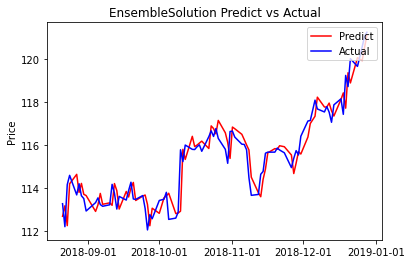

In [64]:
print("Ensemble Solution Model with Original features")
EnsembleModel = EnsembleSolution(ensemble_solution_models)
validate_result(EnsembleModel,'EnsembleSolution')

Ensemble solution with all features shows best result (with RMSE 0.699 and R2 score of 0.887) in comparison with other solution models.

In [65]:
ensemble_solution_model_fs = [lasso_clf_fs,bay_feat_fs,linear_svr_clf_fs]

print("Ensemble Solution Model with Selected features")
EnsembleModel_fs = EnsembleSolution(ensemble_solution_model_fs)
feature_selected_validate_result(EnsembleModel_fs,'EnsembleSolution with FS')


Ensemble Solution Model with Selected features
EnsembleSolution with FS

RMSE:  0.7106997685521943
R2 score:  0.8836616662485971
----------------------


Ensemble solution with feature selection has better solution (RMSE 0.711 and  R2score 0.884 ) but Lasso has best performance (RMSE - 0.709 and R2 score 0.884)

## Train Model Multiple Times
By the train_reg_multipletimes function.This function would train the model several times (I choosed 7 times ), and use different parameters on TimeSeriesSplit in each time, average the R2 and RMSE.
I will apply this function on Benchmark model and on top performing solution models with all features which are Linear SVR, Lasso, Ridge and Bayesian ridge and compare the same.

In [66]:
def train_reg_multipletimes(model, times):
    total_rmse = 0
    total_r2 = 0
    for i in range(times):
        reg = model
        for train_index, test_index in TimeSeriesSplit(n_splits=i+2).split(feature_minmax_transform):
            X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
            y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()
            reg.fit(X_train, y_train)
        predicted = reg.predict(validation_X)
        rmse, r2 = print_result(validation_y, predicted, [0,len(validation_y)])
        total_rmse += rmse
        total_r2 += r2
    return total_rmse / times, total_r2 / times

def print_result(actual, predict, index):
    RMSE_score = np.sqrt(mean_squared_error(actual, predict))
    print('From {} to {}'.format(index[0],index[-1]))
    print('RMSE: ', RMSE_score)
    R2_score = r2_score(actual, predict)
    print('R2 score: ', R2_score)
    print('---------------------')
    return RMSE_score, R2_score

In [67]:
print('Benchmark')
t_multiple_benchmark_RMSE,t_multiple_benchmark_R2 = train_reg_multipletimes(benchmark_dt, 7)
print('RMSE: {} //  R2: {}\n'.format(t_multiple_benchmark_RMSE, t_multiple_benchmark_R2))


Benchmark
From 0 to 89
RMSE:  2.346579479187656
R2 score:  -0.2682971841342343
---------------------
From 0 to 89
RMSE:  1.877772693825027
R2 score:  0.18784947379069872
---------------------
From 0 to 89
RMSE:  1.5517043184568713
R2 score:  0.44541460414941547
---------------------
From 0 to 89
RMSE:  1.228646252656072
R2 score:  0.6523003831290335
---------------------
From 0 to 89
RMSE:  1.1670957113959453
R2 score:  0.6862646627576489
---------------------
From 0 to 89
RMSE:  1.2755668698014893
R2 score:  0.6252367876091889
---------------------
From 0 to 89
RMSE:  1.25920125218031
R2 score:  0.6347915772003545
---------------------
RMSE: 1.52950951107191 //  R2: 0.42336575778601515



In [68]:
print('LSVR')
t_multiple_LSVR_RMSE,t_multiple_LSVR_R2 = train_reg_multipletimes(linear_svr_clf_feat, 7)
print(' RMSE: {} //  R2: {}'.format(t_multiple_LSVR_RMSE, t_multiple_LSVR_R2))

LSVR
From 0 to 89
RMSE:  7.448867721246755
R2 score:  -11.780004755037966
---------------------
From 0 to 89
RMSE:  6.193065714061982
R2 score:  -7.83409098587005
---------------------
From 0 to 89
RMSE:  3.520052745972767
R2 score:  -1.8539662545906879
---------------------
From 0 to 89
RMSE:  1.3163166995578204
R2 score:  0.6009096070455371
---------------------
From 0 to 89
RMSE:  1.1821445047656916
R2 score:  0.6781217534610209
---------------------
From 0 to 89
RMSE:  1.0975015118074531
R2 score:  0.7225653214946297
---------------------
From 0 to 89
RMSE:  0.9590853012710397
R2 score:  0.7881321977342864
---------------------
 RMSE: 3.102433456954787 //  R2: -2.6683333022518902


In [69]:
print('Lasso')
t_multiple_lasso_RMSE,t_multiple_lasso_R2 = train_reg_multipletimes(lasso_clf_feat, 7)
print(' RMSE: {} //  R2: {}'.format(t_multiple_lasso_RMSE, t_multiple_lasso_R2))

Lasso
From 0 to 89
RMSE:  1.1414461432193481
R2 score:  0.6999032159588523
---------------------
From 0 to 89
RMSE:  1.6184903121927243
R2 score:  0.3966480791468052
---------------------
From 0 to 89
RMSE:  1.2272053345148615
R2 score:  0.6531154475172145
---------------------
From 0 to 89
RMSE:  0.9458767879471214
R2 score:  0.7939276958254348
---------------------
From 0 to 89
RMSE:  0.8279814045285283
R2 score:  0.8420965359183817
---------------------
From 0 to 89
RMSE:  0.7928926592226431
R2 score:  0.8551964245471747
---------------------
From 0 to 89
RMSE:  0.7724600996807837
R2 score:  0.8625633366388252
---------------------
 RMSE: 1.0466218201865727 //  R2: 0.7290643907932413


In [70]:
print('Ridge')
t_multiple_ridge_RMSE,t_multiple_ridge_R2 = train_reg_multipletimes(ridge_clf_feat, 7)
print(' RMSE: {} //  R2: {}'.format(t_multiple_ridge_RMSE, t_multiple_ridge_R2))

Ridge
From 0 to 89
RMSE:  3.035819230634388
R2 score:  -1.1227668982345382
---------------------
From 0 to 89
RMSE:  3.361570100676434
R2 score:  -1.6027642678117444
---------------------
From 0 to 89
RMSE:  1.6567313512447952
R2 score:  0.3677997361335923
---------------------
From 0 to 89
RMSE:  0.8283219431274634
R2 score:  0.8419666216906962
---------------------
From 0 to 89
RMSE:  0.7493347106738135
R2 score:  0.870669132032296
---------------------
From 0 to 89
RMSE:  0.7175996615396213
R2 score:  0.8813917381052565
---------------------
From 0 to 89
RMSE:  0.7123183568055503
R2 score:  0.8831311516888594
---------------------
 RMSE: 1.5802421935288664 //  R2: 0.15991817337205966


In [71]:
print('BayRidge')
t_multiple_bayridge_RMSE,t_multiple_bayridge_R2 = train_reg_multipletimes(bay_feat, 7)
print(' RMSE: {} //  R2: {}'.format(t_multiple_bayridge_RMSE, t_multiple_bayridge_R2))

BayRidge
From 0 to 89
RMSE:  3.004945261941388
R2 score:  -1.079809808079851
---------------------
From 0 to 89
RMSE:  3.3171867780674287
R2 score:  -1.5344886031088114
---------------------
From 0 to 89
RMSE:  1.5972510027653273
R2 score:  0.4123796463090965
---------------------
From 0 to 89
RMSE:  0.7995748378770785
R2 score:  0.8527454480257781
---------------------
From 0 to 89
RMSE:  0.7307474880208709
R2 score:  0.8770056522942663
---------------------
From 0 to 89
RMSE:  0.7098918230064726
R2 score:  0.8839260299489105
---------------------
From 0 to 89
RMSE:  0.7070366584921954
R2 score:  0.8848578446516295
---------------------
 RMSE: 1.5523762643101087 //  R2: 0.18523088714871694


In [72]:
print('Ensemble')
t_multiple_ensemble_RMSE,t_multiple_ensemble_R2 = train_reg_multipletimes(EnsembleSolution(ensemble_solution_models), 7)
print(' RMSE: {} //  R2: {}\n'.format(t_multiple_ensemble_RMSE, t_multiple_ensemble_R2))

Ensemble
From 0 to 89
RMSE:  2.365101085717762
R2 score:  -0.2883975972957289
---------------------
From 0 to 89
RMSE:  2.7533763820748356
R2 score:  -0.7461504368242113
---------------------
From 0 to 89
RMSE:  1.4876420938143031
R2 score:  0.49026153318144483
---------------------
From 0 to 89
RMSE:  0.8472355618995774
R2 score:  0.8346672671289925
---------------------
From 0 to 89
RMSE:  0.7555732429995994
R2 score:  0.868506698044933
---------------------
From 0 to 89
RMSE:  0.7204376103259291
R2 score:  0.8804517438753503
---------------------
From 0 to 89
RMSE:  0.7109945316536496
R2 score:  0.8835651434665269
---------------------
 RMSE: 1.3771943583550939 //  R2: 0.41755776451104387



In [74]:
def cross_validate(model, ts_split):
    clf = model
    total_rmse = 0
    total_r2 = 0
    count = 0
    for train_index, test_index in ts_split.split(validation_X):
        X_test1, X_test2 = validation_X[:len(train_index)], validation_X[len(train_index): (len(train_index)+len(test_index))]
        y_test1, y_test2 = validation_y[:len(train_index)].values.ravel(), validation_y[len(train_index): (len(train_index)+len(test_index))].values.ravel()
        predicted_test1 = clf.predict(X_test1)
        temp1_RMSE, temp1_R2 = print_result(y_test1, predicted_test1, train_index)

        predicted_test2 = clf.predict(X_test2)
        temp2_RMSE, temp2_R2 = print_result(y_test2, predicted_test2, test_index)
        
        total_rmse += temp1_RMSE + temp2_RMSE
        total_r2 += temp1_R2 + temp2_R2
        count += 2
    return total_rmse / count, total_r2 / count



# Cross Validation

In [75]:
timeseries_cv = TimeSeriesSplit(n_splits=10)
test_bench__RMSE, test_bench_R2 = cross_validate(benchmark_dt,timeseries_cv)

From 0 to 8
RMSE:  1.5816773136305156
R2 score:  -4.3835768203190275
---------------------
From 9 to 16
RMSE:  1.551405760917378
R2 score:  -18.04187945304726
---------------------
From 0 to 16
RMSE:  1.5675047011870964
R2 score:  -6.899320734863128
---------------------
From 17 to 24
RMSE:  0.9221727820787535
R2 score:  -6.673895597140622
---------------------
From 0 to 24
RMSE:  1.393892792437022
R2 score:  -6.795208642622705
---------------------
From 25 to 32
RMSE:  1.3997109165876913
R2 score:  -5.301290628129201
---------------------
From 0 to 32
RMSE:  1.3953054745403506
R2 score:  -4.753713853886452
---------------------
From 33 to 40
RMSE:  1.3349849615275644
R2 score:  -0.8202266231827442
---------------------
From 0 to 40
RMSE:  1.3837421152339135
R2 score:  -0.711963807942946
---------------------
From 41 to 48
RMSE:  1.069398135640321
R2 score:  -3.343623825189364
---------------------
From 0 to 48
RMSE:  1.3374765371235258
R2 score:  -0.02585061558909474
-----------------

In [76]:
test_lsvr__RMSE, test_lsvr_R2 = cross_validate(lsvr_grid_search_feat,timeseries_cv)

From 0 to 8
RMSE:  0.9599334682758465
R2 score:  -0.9829757855524788
---------------------
From 9 to 16
RMSE:  0.619977966474501
R2 score:  -2.0409657057986994
---------------------
From 0 to 16
RMSE:  0.8177527241293205
R2 score:  -1.1498890256754297
---------------------
From 17 to 24
RMSE:  0.5009745824889374
R2 score:  -1.2647625274201548
---------------------
From 0 to 24
RMSE:  0.7314652708462771
R2 score:  -1.1466261776051332
---------------------
From 25 to 32
RMSE:  0.8002350870585079
R2 score:  -1.0596242194319716
---------------------
From 0 to 32
RMSE:  0.7487169958898323
R2 score:  -0.6567044799100357
---------------------
From 33 to 40
RMSE:  1.0380265584544428
R2 score:  -0.10049898395947254
---------------------
From 0 to 40
RMSE:  0.8132895969124396
R2 score:  0.4086090218410122
---------------------
From 41 to 48
RMSE:  0.6619473434300883
R2 score:  -0.6642564488804108
---------------------
From 0 to 48
RMSE:  0.790562096466155
R2 score:  0.6415869982420725
----------

In [77]:
test_ridge__RMSE, test_ridge_R2 = cross_validate(ridge_clf_feat,timeseries_cv)

From 0 to 8
RMSE:  0.907835203610649
R2 score:  -0.7735734660441287
---------------------
From 9 to 16
RMSE:  0.5179907108055101
R2 score:  -1.1227700666876155
---------------------
From 0 to 16
RMSE:  0.7500587358992586
R2 score:  -0.808683559586306
---------------------
From 17 to 24
RMSE:  0.45565413470581423
R2 score:  -0.8735354613841826
---------------------
From 0 to 24
RMSE:  0.6700735287377206
R2 score:  -0.8014156103258927
---------------------
From 25 to 32
RMSE:  0.6528874405658011
R2 score:  -0.3709746976519581
---------------------
From 0 to 32
RMSE:  0.6659479329056691
R2 score:  -0.31066050754441266
---------------------
From 33 to 40
RMSE:  1.0970483761938363
R2 score:  -0.2292048727549012
---------------------
From 0 to 40
RMSE:  0.7692755626980471
R2 score:  0.4708873632388094
---------------------
From 41 to 48
RMSE:  0.6186639000055365
R2 score:  -0.45372718316835026
---------------------
From 0 to 48
RMSE:  0.7467636392897837
R2 score:  0.680200260021095
---------

In [78]:
test_lasso__RMSE, test_lasso_R2 = cross_validate(lasso_clf_feat,timeseries_cv)

From 0 to 8
RMSE:  0.891965269715592
R2 score:  -0.7121075125509921
---------------------
From 9 to 16
RMSE:  0.6533459067409703
R2 score:  -2.377111198977235
---------------------
From 0 to 16
RMSE:  0.788718445709864
R2 score:  -0.9999357294119391
---------------------
From 17 to 24
RMSE:  0.5344643734693988
R2 score:  -1.5776788544094846
---------------------
From 0 to 24
RMSE:  0.717231418840949
R2 score:  -1.0638950559146667
---------------------
From 25 to 32
RMSE:  0.7121634576886994
R2 score:  -0.6312186649885587
---------------------
From 0 to 32
RMSE:  0.7160061161930243
R2 score:  -0.5151063813904357
---------------------
From 33 to 40
RMSE:  1.2330096829944097
R2 score:  -0.5527648440223847
---------------------
From 0 to 40
RMSE:  0.8421870491343677
R2 score:  0.3658363013662371
---------------------
From 41 to 48
RMSE:  0.5275986038529178
R2 score:  -0.05725716400057057
---------------------
From 0 to 48
RMSE:  0.7993278087883414
R2 score:  0.6335948037365893
------------

In [79]:
test_bay_RMSE, test_bay_R2 = cross_validate(bay_feat,timeseries_cv)

From 0 to 8
RMSE:  0.9055216308081843
R2 score:  -0.7645452573976439
---------------------
From 9 to 16
RMSE:  0.5138253602377397
R2 score:  -1.0887674093740576
---------------------
From 0 to 16
RMSE:  0.7472245438303144
R2 score:  -0.7950407035312395
---------------------
From 17 to 24
RMSE:  0.4438617301351221
R2 score:  -0.7778155066698953
---------------------
From 0 to 24
RMSE:  0.665370955337533
R2 score:  -0.7762196787369224
---------------------
From 25 to 32
RMSE:  0.6604271989434453
R2 score:  -0.4028224674170837
---------------------
From 0 to 32
RMSE:  0.6641758480640727
R2 score:  -0.3036944632446035
---------------------
From 33 to 40
RMSE:  1.0784663935637546
R2 score:  -0.18791659181274412
---------------------
From 0 to 40
RMSE:  0.7628891407233024
R2 score:  0.4796361397908172
---------------------
From 41 to 48
RMSE:  0.637421188874293
R2 score:  -0.5432147064032964
---------------------
From 0 to 48
RMSE:  0.7438515275732858
R2 score:  0.6826896064929205
----------

In [80]:
test_ensemble_RMSE, test_ensemble_R2 = cross_validate(EnsembleSolution(ensemble_solution_models),timeseries_cv)

From 0 to 8
RMSE:  0.895812687192011
R2 score:  -0.726909431954539
---------------------
From 9 to 16
RMSE:  0.5502091569483957
R2 score:  -1.3950503054883923
---------------------
From 0 to 16
RMSE:  0.7531957118495932
R2 score:  -0.8238441365820557
---------------------
From 17 to 24
RMSE:  0.46760362734446115
R2 score:  -0.9730906088979923
---------------------
From 0 to 24
RMSE:  0.6750819056787719
R2 score:  -0.8284451392489565
---------------------
From 25 to 32
RMSE:  0.6485775205893919
R2 score:  -0.35293395140696715
---------------------
From 0 to 32
RMSE:  0.6687530659478427
R2 score:  -0.3217253978420769
---------------------
From 33 to 40
RMSE:  1.1249803272805565
R2 score:  -0.29259529620520497
---------------------
From 0 to 40
RMSE:  0.7790434688430774
R2 score:  0.45736519948913046
---------------------
From 41 to 48
RMSE:  0.5435743378657472
R2 score:  -0.12225423349917608
---------------------
From 0 to 48
RMSE:  0.745695706754311
R2 score:  0.6811142850895647
-------

In [81]:
print('Benchmark RMSE: {} // Benchmark R2: {}'.format(test_bench__RMSE, test_bench_R2))
print('LSVR RMSE: {} // LSVR R2: {}'.format(test_lsvr__RMSE, test_lsvr_R2))
print('Lasso RMSE: {} // Lasso R2: {}'.format(test_lasso__RMSE, test_lasso_R2))
print('bayesian ridge RMSE: {} // Bayesian ridge R2: {}'.format(test_bay_RMSE, test_bay_R2))

print('Ensemble RMSE: {} // Ensemble R2: {}'.format(test_ensemble_RMSE, test_ensemble_R2))

Benchmark RMSE: 1.2928331365484411 // Benchmark R2: -3.477902434807502
LSVR RMSE: 0.740181220827799 // LSVR R2: -0.2393180752444358
Lasso RMSE: 0.7566217129287351 // Lasso R2: -0.29827496844573603
bayesian ridge RMSE: 0.6935273435461385 // Bayesian ridge R2: -0.03217079926388829
Ensemble RMSE: 0.6978649335840024 // Ensemble R2: -0.04880843531717279


**hope you like this kernel. please upvote to show your support**